## PCA with the Iris dataset

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# Name of the target variable
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Name of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
label_dict = {i: k for i, k in enumerate(iris.target_names)}
# {0: 'setosasa', 1: 'versicolor', 2: 'virginica'}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:, 0].real[y == label],
                   y=X[:, 1].real[y == label],
                   color=color, alpha=0.5,
                   label=label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

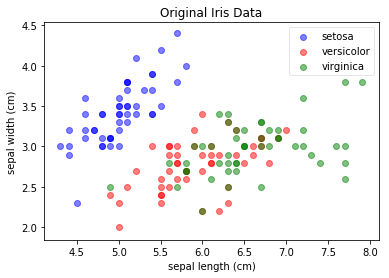

In [7]:
plot(X, y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

Let us now perform a PCA of the iris dataset in order to obtain our principal components. Recall that this happens in four steps.

Creating the covariance matrix of the dataset

To calculate the covariance matrix of iris, we will first calculate the feature-wise mean vector (for use in the future) and then calculate our covariance matrix using NumPy.

The covariance matrix is a d x d matrix (square matrix with the same number of features as the number of rows and columns) that represents feature interactions between each feature. It is quite similar to a correlation matrix:

In [8]:
# Calculate a PCA manually
import numpy as np

# calculate the mean vector
mean_vector = X.mean(axis=0)
print(mean_vector)

[5.84333333 3.054      3.75866667 1.19866667]


In [9]:
# calculate the covariance matrix
cov_mat = np.cov((X - mean_vector).T)
print(cov_mat.shape)

(4, 4)


In [10]:
cov_mat

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Calculating the eigenvalues of the covariance matrix

In [11]:
# calculate the eigenvectors and eigenvalues of our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Print the eigen vectors and corresponding eigenvalues
# in order of descending eigenvalues
for i in range(len(eig_val_cov)):
 eigvec_cov = eig_vec_cov[:,i]
 print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
 print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
 print(30 * '-')


Eigenvector 1: 
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
Eigenvalue 1 from covariance matrix: 4.224840768320114
------------------------------
Eigenvector 2: 
[-0.65653988 -0.72971237  0.1757674   0.07470647]
Eigenvalue 2 from covariance matrix: 0.24224357162751575
------------------------------
Eigenvector 3: 
[-0.58099728  0.59641809  0.07252408  0.54906091]
Eigenvalue 3 from covariance matrix: 0.0785239080941545
------------------------------
Eigenvector 4: 
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]
Eigenvalue 4 from covariance matrix: 0.02368302712600224
------------------------------


In [12]:
# calculate the eigenvectors and eigvenvalues of our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Print the eigen vectors and corresponding eigenvalues
# in order of descending eigenvalues
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
Eigenvalue 1 from covariance matrix: 4.224840768320114
------------------------------
Eigenvector 2: 
[-0.65653988 -0.72971237  0.1757674   0.07470647]
Eigenvalue 2 from covariance matrix: 0.24224357162751575
------------------------------
Eigenvector 3: 
[-0.58099728  0.59641809  0.07252408  0.54906091]
Eigenvalue 3 from covariance matrix: 0.0785239080941545
------------------------------
Eigenvector 4: 
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]
Eigenvalue 4 from covariance matrix: 0.02368302712600224
------------------------------


In [13]:
# Keeping the top k eigenvalues (sorted by the descending eigenvalues)
eig_val_cov

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

A scree plot is a simple line graph that shows the percentage of total variance explained in the data by each principal component. 

To build this plot, we will sort the eigenvalues in order of descending value and plot the cumulative variance explained by each component and all components prior. 

In the case of iris, we will have four points on our scree plot, one for each principal component. Each component on its own explains a percentage of the total variance captured, and all components, when the percentages are added up, should account for 100% of the total variance in the dataset.

Let's calculate the percentage of variance explained by each eigenvector (principal component) by taking the eigenvalue associated with that eigenvector and dividing it by the sum of all eigenvalues:

In [15]:
# the percentages of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values

explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

#array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [16]:
# the percentage of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values

explained_variance_ratio = eig_val_cov / eig_val_cov.sum()
explained_variance_ratio

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

What this is telling us is that our four principal components differ vastly in the amount of variance that they account for. The first principal component, as a single feature/column, is able to account for over 92% of the variance in the data. That is astonishing! This means that this single super-column theoretically can do nearly all of the work of the four original columns.

To visualize our scree plot, let's create a plot with the four principal components on the x axis and the cumulative variance explained on the y axis. For every data-point, the y position will represent the total percentage of variance explained using all principal components up until that one:

Text(0,0.5,'% of Variance Explained <= k')

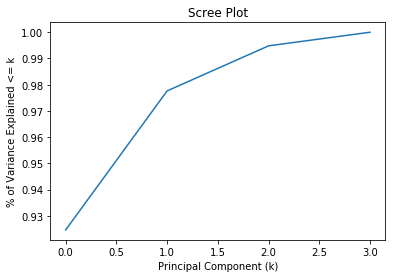

In [17]:
# Scree Plot

plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

This is telling us that the first two components, by themselves, account for nearly 98% of the total variance of the original dataset, meaning that if we only used the first two eigenvectors and used them as our new principal components, then we would be in good shape. 

We would be able to shrink the size of our dataset by half (from four to two columns) while maintaining integrity in performance and speeding up performance.

*An eigenvalue decomposition will always result in as many eigenvectors as we have features. It is up to us to choose how many principal components we wish to use once they are all calculated. This highlights the fact that PCA, like most other algorithms in this text, is semi-supervised and require some human input.

### Using the kept eigenvectors to transform new data-points 

Once we decide to keep two principal components (whether we use a grid search module or the analysis of a scree plot to find the optimal number doesn't matter), we have to be able to use these components to transform incoming, out of sample data-points. To do this, let's first isolate the top two eigenvectors and store them in a new variable called top_2_eigenvectors:

In [18]:
eig_vec_cov

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [19]:
eig_vec_cov[:, :2].T

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [20]:
# store the top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:, :2].T

# show the transpose so that each row is a principal component, we have two rows == two components
top_2_eigenvectors

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [21]:
top_2_eigenvectors.shape

(2, 4)

With these vectors in place, we can use them to project our data into the new and improved super-dataset by multiplying the two matrices together: iris_X and top_2_eigenvectors. The following image shows us how we are going to make sure that the numbers work out:

<img src="pca_transformed_data.png" alt="Drawing" width="500px" height="500px"/>

The preceding figure shows how to utilize principal components to transform datasets from their original feature spaces to the new coordinate systems. In the case of iris, we take our original 150 x 4 dataset and multiply it by the transpose of the top two eigenvectors. We utilize the transpose to ensure that the matrix sizes match up. The result is a matrix with the same number of rows but a reduced number of columns. Each row is multiplied by the two principal components.


By multiplying these matrices together, we are projecting our original dataset onto this new space of two dimensions:

In [22]:
# to transform our data from having shape (150, 4) to  (150, 2)
# we will multiply the matrices of our data and our eigen vectors together

np.dot(X, top_2_eigenvectors.T)[:5, ]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

In [25]:
# # manually centering our data to match scikit-learn's implementation of PCA
# np.dot(X - mean_vector, top_2_eigenvectors.T)[:5, ] # scikit-learn PCA

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

And that's it. We have transformed our four-dimensional iris data into a new matrix with only two columns. This new matrix may serve in place of the original dataset in our machine learning pipeline.

In [23]:
X_pca = np.dot(X, top_2_eigenvectors.T)[:, ]

In [24]:
X_pca[:5]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

And that's it. We have transformed our four-dimensional iris data into a new matrix with only two columns. This new matrix may serve in place of the original dataset in our machine learning pipeline.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
plot(X_pca, y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [ ]:
# References and credits to
# Feature Engineering Made Easy